In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [2]:
data = {'Category_A': ['A1', 'A1', 'A2', 'A2', 'A1', 'A2', 'A1', 'A2'],
        'Category_B': ['B1', 'B2', 'B1', 'B2', 'B1', 'B2', 'B2', 'B1']}
df = pd.DataFrame(data)

In [3]:
contingency_table = pd.crosstab(df['Category_A'], df['Category_B'])
print("Contingency Table:")
print(contingency_table)

Contingency Table:
Category_B  B1  B2
Category_A        
A1           2   2
A2           2   2


In [4]:
df = pd.read_csv("data/StarTrekFatalities.csv")

contingency_table = df.pivot(index='Color', columns='Status', values='Frequency')
print("Contingency Table:")
print(contingency_table)

Contingency Table:
Status  Alive  Dead
Color              
Blue      129     7
Gold       46     9
Red       215    24


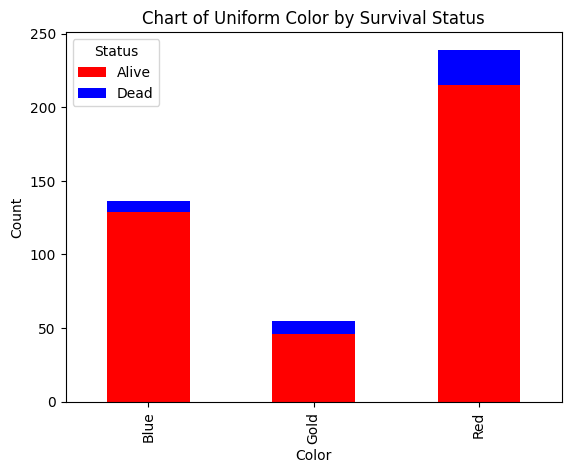

In [5]:
contingency_table.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.title('Chart of Uniform Color by Survival Status')
plt.xlabel('Color')
plt.ylabel('Count')
plt.legend(title='Status')
plt.show()

In [6]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi2 Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)



Chi2 Statistic: 6.188614838582533
P-value: 0.045306379921467986
Degrees of Freedom: 2
Expected Frequencies:
[[123.34883721  12.65116279]
 [ 49.88372093   5.11627907]
 [216.76744186  22.23255814]]


Chi2 Statistic: 6.188614838582533
P-value: 0.045306379921467986
Degrees of Freedom: 2
       Observed_Alive  Observed_Dead  Expected_Alive  Expected_Dead  \
Color                                                                 
Blue              129              7      123.348837      12.651163   
Gold               46              9       49.883721       5.116279   
Red               215             24      216.767442      22.232558   

       Contribution_Alive  Contribution_Dead  
Color                                         
Blue             0.258905           2.524325  
Gold             0.302369           2.948097  
Red              0.014411           0.140508  
Differences DataFrame (Observed - Expected):
       Difference          
Status      Alive      Dead
Color                      
Blue     5.651163 -5.651163
Gold    -3.883721  3.883721
Red     -1.767442  1.767442


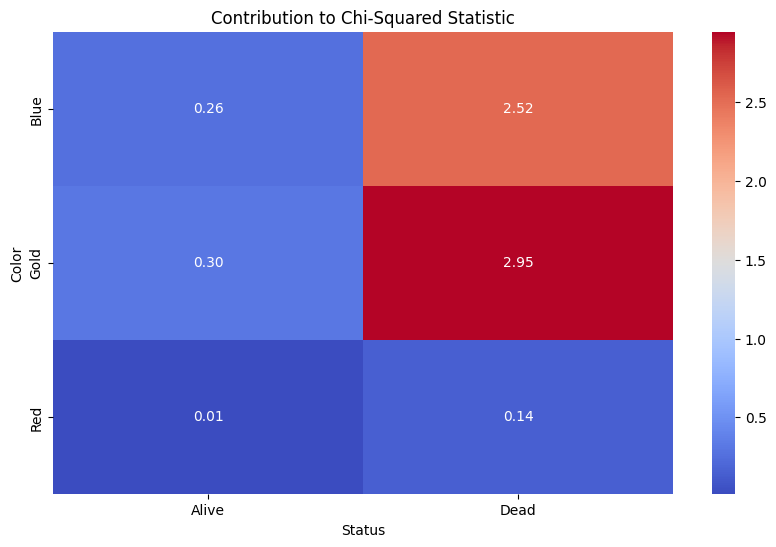

In [7]:
# Calculate the contribution of each cell to the chi-squared statistic
observed = contingency_table.values
contributions = (observed - expected) ** 2 / expected

# Create a DataFrame for the contributions
contribution_df = pd.DataFrame(contributions, index=contingency_table.index, columns=contingency_table.columns)

# Create a DataFrame for the expected frequencies
expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)

# Combine observed, expected, and contributions into one DataFrame
combined_df = contingency_table.stack().reset_index(name='Observed')
combined_df['Expected'] = expected_df.stack().values
combined_df['Contribution'] = contribution_df.stack().values

print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")

# Display the combined DataFrame
combined_df = combined_df.pivot(index='Color', columns='Status')
combined_df.columns = ['_'.join(col).strip() for col in combined_df.columns.values]
print(combined_df)

differences_df = contingency_table - expected_df
differences_df = differences_df.stack().reset_index(name='Difference')
differences_df = differences_df.pivot(index='Color', columns='Status')
# differences_df.columns = [f'Difference_{col}' for col in differences_df.columns]
print("Differences DataFrame (Observed - Expected):")
print(differences_df)

# Display as a heatmap for better visualization
plt.figure(figsize=(10, 6))
sns.heatmap(contribution_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Contribution to Chi-Squared Statistic')
plt.show()